In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Reset PN generator.
seed = 1234
np.random.seed(seed)

### Definição de funções.

A função abaixo gera amostras de uma função ruidosa criada a partir da seguinte função objetivo (i.e., o mapeamento verdadeiro)
$$y = 2 + x_1 + 0.5 x_1^2$$

In [3]:
# Função que cria o modelo gerador (target function).
def target_function(N, x1):
    # Polinômio de grau 2.
    y = 2 + x1 + 0.5*x1**2
    y_noisy = y + np.random.randn(N, 1)
    return y, y_noisy

### Criação do conjunto de dados.

In [4]:
# Example set size.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y, y_noisy = target_function(N, x1)

### Divisão do conjunto total de amostras em conjuntos de treinamento e validação.

In [5]:
# Split arrays or matrices into random train and test subsets.
x1_train, x1_val, y_train, y_val = train_test_split(x1, y_noisy, test_size=0.2, random_state=seed)

print('Training set size: ', len(y_train))
print('Validation set size: ', len(y_val))

Training set size:  24
Validation set size:  6


### Variando a ordem do polinômio aproximador.

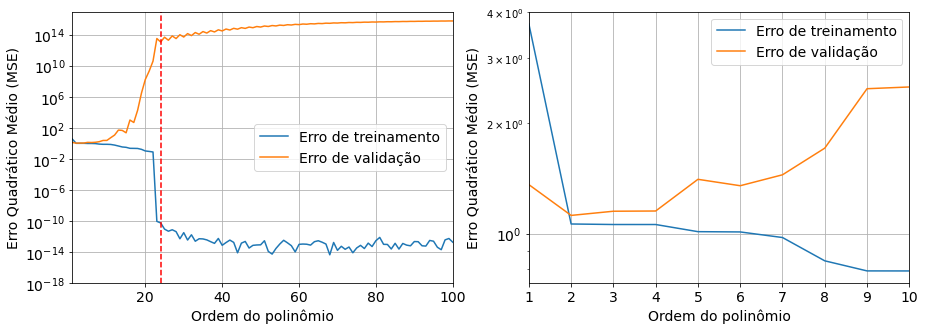

In [6]:
maxDegree = 100
error_train = []
error_val = []
for d in range(1, maxDegree+1):
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression.
    poly_reg.fit(x1_train, y_train)

    # Use the trained model for prediction of the training set.
    y_train_predict = poly_reg.predict(x1_train)
    
    # Use the trained model for prediction of the validation set.
    y_val_predict = poly_reg.predict(x1_val)    

    # Append MSE values to both lists.
    error_train.append(mean_squared_error(y_train, y_train_predict))
    
    error_val.append(mean_squared_error(y_val, y_val_predict))

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, maxDegree+1), error_train, label='Erro de treinamento')
plt.plot(range(1, maxDegree+1), error_val, label='Erro de validação')
plt.plot([24,24],[0, 1e20],'r--')
plt.yscale('log')
plt.xlim([1, maxDegree])
plt.ylim([1e-18, 1e17])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.subplot(1, 2, 2)
degreeToPlot = 10
plt.plot(range(1, degreeToPlot+1), error_train[0:degreeToPlot], label='Erro de treinamento')
plt.plot(range(1, degreeToPlot+1), error_val[0:degreeToPlot], label='Erro de validação')
plt.yscale('log')
plt.xlim([1, degreeToPlot])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("erro_de_aproximacao.png", dpi=600)
plt.show()

**Conclusões**

+ Devido à falta de flexibilidade, o erro cometido por um polinômio de ordem um (i.e., reta) é alto para ambos os conjuntos.

+ O erro de treinamento diminui com o aumento da ordem do polinômio. Entretanto, isso não significa que estamos construindo um modelo melhor, pois vejam que o erro de validação aumenta.

+ Quando a ordem do polinômio se aproxima da quantidade de amostras de treinamento, o modelo **memoriza** as amostras do conjunto de treinamento e o erro de treinamento tende a zero, mas o erro de validação aumenta dasticamente.

+ Portanto, modelos mais complexos não necessariamente são modelos que melhor generalizam (ou seja, apresentam alto erro de validação).

+ Modelos ótimos apresentam **duas características**:
    + **capturam a curvatura** da função objetivo (flexibilidade: medida através do erro de treinamento)
    + **generalizam bem**, ou seja, mapeam valores não vistos durante o treinamento em valores muito próximos dos esperados (capacidade de generalização: medida através do erro de validação).

+ Assim, modelos que se aproximam do modelo gerador e que generalizam bem apresentam erros de treinamento e validação pequenos e próximos.
+ O ponto onde ambos os erros são pequenos e próximos ocorre quando o modelo tem ordem igual a dois.

### Criação de um conjunto de dados com 100 exemplos.

In [7]:
# Reset PN generator.
np.random.seed(seed)

In [8]:
# Example set size.
N = 100

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y, y_noisy = target_function(N, x1)

### Divisão do conjunto total de amostras em conjuntos de treinamento e validação.

In [9]:
# Split arrays or matrices into random train and test subsets.
x1_train, x1_val, y_train, y_val = train_test_split(x1, y_noisy, test_size=0.2, random_state=seed)

print('Training set size: ', len(y_train))
print('Validation set size: ', len(y_val))

Training set size:  80
Validation set size:  20


### Variando a ordem do polinômio aproximador.

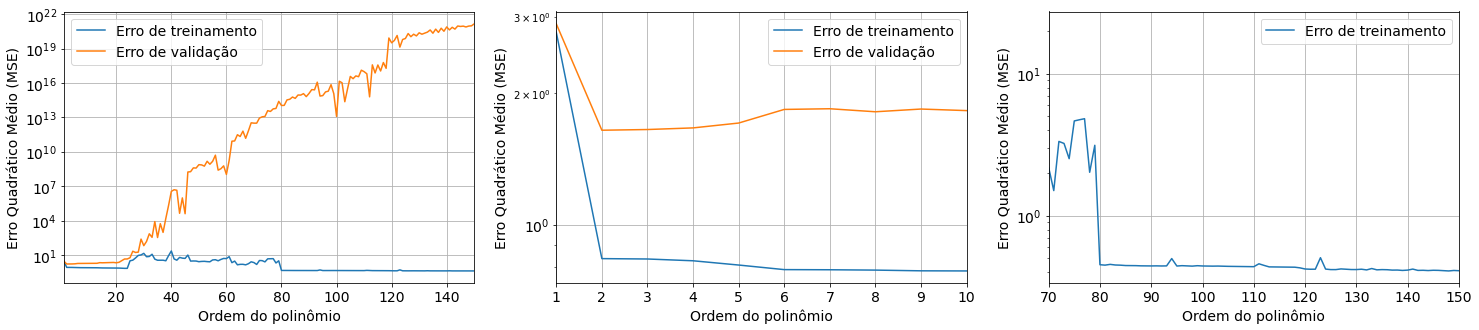

In [10]:
maxDegree = 150
error_train = []
error_val = []
for d in range(1, maxDegree+1):
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression.
    poly_reg.fit(x1_train, y_train)

    # Use the trained model for prediction of the training set.
    y_train_predict = poly_reg.predict(x1_train)
    
    # Use the trained model for prediction of the validation set.
    y_val_predict = poly_reg.predict(x1_val)    

    error_train.append(mean_squared_error(y_train, y_train_predict))
    
    error_val.append(mean_squared_error(y_val, y_val_predict))

fig = plt.figure(figsize=(25,5))

ax = plt.subplot(1, 3, 1)
plt.plot(range(1, maxDegree+1), error_train, label='Erro de treinamento')
plt.plot(range(1, maxDegree+1), error_val, label='Erro de validação')
plt.yscale('log')
plt.xlim([1, maxDegree])
#plt.ylim([0.1,10])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.subplot(1, 3, 2)
degreeToPlot = 10
plt.plot(range(1, degreeToPlot+1), error_train[0:degreeToPlot], label='Erro de treinamento')
plt.plot(range(1, degreeToPlot+1), error_val[0:degreeToPlot], label='Erro de validação')
plt.yscale('log')
plt.xlim([1, degreeToPlot])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.subplot(1, 3, 3)
plt.plot(range(1, maxDegree+1), error_train, label='Erro de treinamento')
plt.yscale('log')
plt.xlim([70, maxDegree])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.savefig("erro_de_aproximacao.png", dpi=600)
plt.show()

**Conclusões**:

+ Devido à **falta de flexibilidade**, o **erro** cometido por um polinômio de **ordem um é alto** para **ambos os conjuntos**.
+ Erro de treinamento decresce rapidamente apenas quando a ordem do modelo se aproxima do número de amostras do conjunto de treinamento.
+ Isso de deve ao fato de o modelo não ter capacidade o suficiente para **memorizar** as amostras até próximo da ordem 80.
+ O ponto onde ambos os erros são pequenos e próximos ocorre quando o modelo tem ordem igual a dois.

### Criação de um conjunto de dados com 10.000 exemplos.

In [11]:
# Reset PN generator.
np.random.seed(seed)

In [12]:
# Example set size.
N = 10000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y, y_noisy = target_function(N, x1)

### Divisão do conjunto total de amostras em conjuntos de treinamento e validação.

In [13]:
# Split arrays or matrices into random train and test subsets.
x1_train, x1_val, y_train, y_val = train_test_split(x1, y_noisy, test_size=0.2, random_state=seed)

print('Training set size: ', len(y_train))
print('Validation set size: ', len(y_val))

Training set size:  8000
Validation set size:  2000


### Variando a ordem do polinômio aproximador.¶

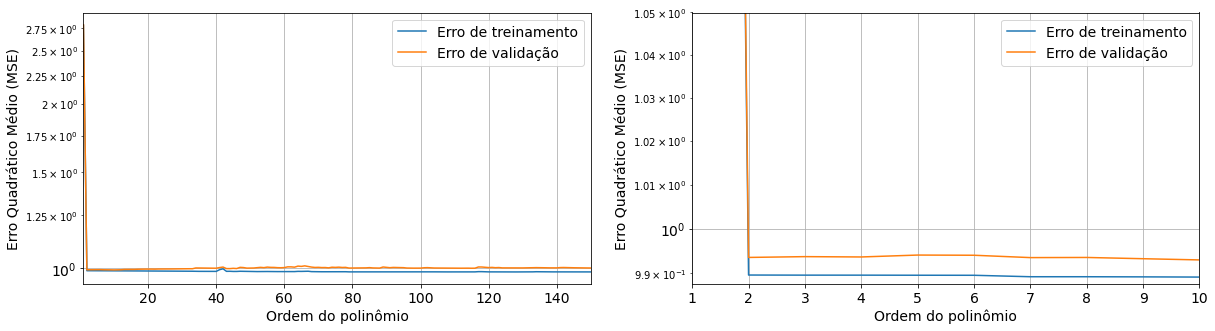

In [14]:
maxDegree = 150
error_train = []
error_val = []
for d in range(1, maxDegree+1):
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=d, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression.
    poly_reg.fit(x1_train, y_train)

    # Use the trained model for prediction of the training set.
    y_train_predict = poly_reg.predict(x1_train)
    
    # Use the trained model for prediction of the validation set.
    y_val_predict = poly_reg.predict(x1_val)    

    error_train.append(mean_squared_error(y_train, y_train_predict))
    
    error_val.append(mean_squared_error(y_val, y_val_predict))

fig = plt.figure(figsize=(20,5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, maxDegree+1), error_train, label='Erro de treinamento')
plt.plot(range(1, maxDegree+1), error_val, label='Erro de validação')
plt.yscale('log')
plt.xlim([1, maxDegree])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
#plt.ylim([0.99, 1.05])
plt.grid()
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.subplot(1, 2, 2)
degreeToPlot = 10
plt.plot(range(1, degreeToPlot+1), error_train[0:degreeToPlot], label='Erro de treinamento')
plt.plot(range(1, degreeToPlot+1), error_val[0:degreeToPlot], label='Erro de validação')
plt.yscale('log')
plt.xlim([1, degreeToPlot])
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro Quadrático Médio (MSE)', fontsize=14)
plt.ylim([0.9875, 1.05])
plt.grid()
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig("erro_de_aproximacao.png", dpi=600)
plt.show()

**Conclusões**

+ Devido à falta de flexibilidade, mesmo com muitas amostras, o erro cometido por um polinômio de ordem um é alto para ambos os conjuntos.
+ Polinômios com ordem maior ou igual a dois apresentam ambos os erros pequenos e com comportamento bastante semelhante. Ou seja, até polinômios com ordem muito maior do que dois seriam bons aproximadores do modelo gerador.
+ O **subajuste** não pode ser evitado aumentado-se o número de amostras de treinamento, apenas através do aumento da flexibilidade do modelo. 
+ Já o **sobreajuste** pode ser evitado aumentando-se o número de amostras de treinamento, ou diminuindo-se a flexibilidade do modelo.